# Coding a simple decision tree with lower quantile and 70/30 ratio

This notebook was developed from an initial template given by **Code Canteen** and data scientist Lila Rose. They can be reach at http://futurecoders.org.uk/. The initial work was based on using medians as indicators and a train/test ratio of 80/20.<br>

In the following notebooks, we will use different ratios and different indicators, to see how the decision trees change (or not). For the complete explanations, please refer to the notebook *Decision-Tree-coded-model-Median-80-20*.

Author of the final document: Ester Giménez Mojón.

In this worksheet we are going to code a decision tree, which will use the calculated probabilities to make decisions about wheter a row of given data would be classified as `Iris virginica`, `Iris setosa` or `Iris versicolor`, or not, based on sepal and petal dimensions. With this information, species would be further predicted by probabilities of error.

This notebook will provide a decision tree for every one of the three different types of Iris considered. Each tree will be independent of each other.

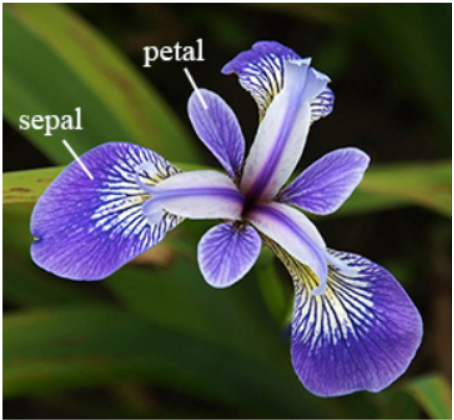

In order to manage decision trees, we need to decide which item we will use as a discriminator for separating values above and below it. We can use the median, the mean, quartiles (25 or 75), etc. The splitting will be used later, to see if the remaining data (the test set) relates well or not with the train set.

We will use:

- quantile (0.25) as an indicator.
- train/test percentages as 70/30.

### 1. READ THE IRIS DATASET
***

Like with the previous notebook, we will use the same iris dataset, located at https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data.<br>

The columns in the CSV file do not have headings, so we need to add them:<br>

> url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"<br>
> names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']<br>
> iris_data = pd.read_csv(url, name=names)<br>

There are 150 rows of data, no empty spaces.<br>

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)
iris_data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [2]:
iris_data.quantile(0.25)

sepal-length    5.1
sepal-width     2.8
petal-length    1.6
petal-width     0.3
Name: 0.25, dtype: float64

In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2. SPLIT THE DATA INTO TRAIN AND TEST DATASETS
***

In [4]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from all columns
train, test = train_test_split(iris_data, test_size=0.30, random_state=2)
# random_state fixes the results of the calculation every time that the whole notebook is run, otherwise it will show
# different results, due to the random test_size, as it will choose different items every time.
train.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.887619,3.057143,3.829524,1.220952
std,0.820494,0.442862,1.765749,0.760275
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.400000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 3. ASSUMPTIONS
***

Same as in the previous notebook, we will only use the data we have on the 3 species as a representation of the genera (wrongly written "species" in previous notebooks).

In [5]:
sl_indicator = iris_data['sepal-length'].quantile(0.25)
sw_indicator = iris_data['sepal-width'].quantile(0.25)
pl_indicator = iris_data['petal-length'].quantile(0.25)
pw_indicator = iris_data['petal-width'].quantile(0.25)

print(sl_indicator, sw_indicator, pl_indicator, pw_indicator)
display(train.describe())

5.1 2.8 1.6 0.3


,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.887619,3.057143,3.829524,1.220952
std,0.820494,0.442862,1.765749,0.760275
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.400000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The lower quantiles change slightly because it is not the same to calculate them from the whole set or from the train set.

- quantiles of the whole set: 5.1, 2.8, 1.6, 0.3
- quantiles after split: 5.2, 2.8, 1.5, 0.3

### 4. PROPORTION OF VALUES ON or ABOVE AND BELOW THE INDICATOR
***

This calculates the probability of elements in a specified column, that are:<br>

- **above** the median in relation to the total number of elements in that column. <br>
- **below** the median in relation to the total number of elements of the column.<br>

This will be used to calculate the Gini Index of the above and the below values.

This calculates the probability of elements in a specified column, that are:<br>

- above the lower quantile in relation to the total number of elements in that column.<br>
- below the lower quantile in relation to the total number of elements of the column.<br>

This will be used to calculate the Gini Index of the above and the below values.

__SEPAL LENGHT__

In [6]:
# Calculate the proportion of values in sepal-length column that are on or above the lower quantile (indicator)
sl_vi_above_indicator = train[train['sepal-length'] >= sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
sl_vi_below_indicator = train[train['sepal-length'] < sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
print(sl_vi_above_indicator)
print(sl_vi_below_indicator)

0.819047619047619
0.18095238095238095


__SEPAL WIDTH__

In [7]:
# Calculate the proportion of values in sepal-width column that are on or above the lower quantile

sw_indicator_vi_above = train[train['sepal-width'] >= sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
sw_indicator_vi_below = train[train['sepal-width'] < sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
print(sw_indicator_vi_above)
print(sw_indicator_vi_below)

0.7619047619047619
0.23809523809523808


__PETAL LENGHT__

In [8]:
# Calculate the proportion of values in petal-length column that are on or above the lower quantile
pl_vi_above_indicator = train[train['petal-length'] >= pl_indicator]['petal-length'].count() / train['petal-length'].count()
pl_vi_below_indicator = train[train['petal-length'] < pl_indicator]['petal-length'].count() / train['petal-length'].count()
print(pl_vi_above_indicator)
print(pl_vi_below_indicator)

0.7428571428571429
0.2571428571428571


__PETAL WIDTH__

In [9]:
# Calculate the proportion of values in petal-width column that are on or above the lower quantile
pw_vi_above_indicator = train[train['petal-width'] >= pw_indicator]['petal-width'].count() / train['petal-width'].count()
pw_vi_below_indicator = train[train['petal-width'] < pw_indicator]['petal-width'].count() / train['petal-width'].count()
print(pw_vi_above_indicator)
print(pw_vi_below_indicator)

0.780952380952381
0.21904761904761905


The results are as follow:

|LOWER QUANTILE|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|--------------|------------|-----------|------------|-----------|
|xx_vi_above_indicator|0.819|0.762|0.743|0.781|
|xx_vi_below_indicator|0.181|0.238|0.257|0.219|

### 5 - CALCULATION OF THE PROPORTION OF VALUES (CONDITIONED PROBABILITY) ON OR ABOVE THE INDICATOR THAT ARE OF A GIVEN SPECIES 
***

We will calculate the probability of a row being on or above the indicator and of a given species at the same time. <br>
The same will be done with the rows being under the indicator and of a given species at the same time.<br>
The calculations will be done for every column as well.<br>

The steps would be, for example:<br>

- Filter by values in the sepal-length column that are on or above the lower quantile (sl_indicator) and the species column being `Iris-virginica`, for example.<br>
- Filter by values in the sepal-length column that are on or above the lower quantile (sl_indicator) only.<br>
- Divide both results.

Instead of filtering the columns again and repeating the steps above to know which numbers are ON or ABOVE the indicator and NOT of one of the given species, we will do a substraction:<br>

> = 1 - (the proportion of those that are Iris virginica)<br>

### 5.1 - On or above the indicator and `Iris virginica` 

In [10]:
# calculate the proportion of results where the value is on or above the lower quantile that are of the species Iris-virginica
sl_vi_above = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-virginica')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-virginica')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-virginica')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-virginica')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above, sw_vi_above, pl_vi_above, pw_vi_above)

0.4186046511627907 0.35 0.47435897435897434 0.45121951219512196


In [11]:
# calculate the proportion of results where the column is above the lower quantile that are NOT of the species Iris-virginica

no_sl_vi_above = 1 - sl_vi_above
no_sw_vi_above = 1 - sw_vi_above
no_pl_vi_above = 1 - pl_vi_above
no_pw_vi_above = 1 - pw_vi_above

print(no_sl_vi_above, no_sw_vi_above, no_pl_vi_above, no_pw_vi_above)

0.5813953488372092 0.65 0.5256410256410257 0.5487804878048781


The results for `Iris Virginica` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris v.|0.4186|0.35|0.474|0.4512|
|above not Iris v.|0.5814|0.65|0.5256|0.5488|

### 5.2 - On or above the indicator and `Iris setosa`

In [12]:
# calculate the proportion of results where the value is on or above the lower quantile that are of the species Iris-setosa
sl_vi_above_cet = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-setosa')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above_cet = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-setosa')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above_cet = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-setosa')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above_cet = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-setosa')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above_cet, sw_vi_above_cet, pl_vi_above_cet, pw_vi_above_cet)

0.19767441860465115 0.4125 0.07692307692307693 0.12195121951219512


In [13]:
# calculate the proportion of results where the column is above the lower quantile that are NOT of the species Iris-setosa

no_sl_vi_above_cet = 1 - sl_vi_above_cet
no_sw_vi_above_cet = 1 - sw_vi_above_cet
no_pl_vi_above_cet = 1 - pl_vi_above_cet
no_pw_vi_above_cet = 1 - pw_vi_above_cet

print(no_sl_vi_above_cet, no_sw_vi_above_cet, no_pl_vi_above_cet, no_pw_vi_above_cet)

0.8023255813953488 0.5875 0.9230769230769231 0.8780487804878049


The results for `Iris setosa` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris s.|0.1977|0.4125|0.0769|0.122|
|above not Iris s.|0.8023|0.5875|0.9231|0.878|

### 5.3 - On or above the indicator and `Iris versicolor`

In [14]:
# calculate the proportion of results where the value is on or above the lower quantile that are of the species Iris-versicolor
sl_vi_above_ver = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above_ver = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above_ver = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-versicolor')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above_ver = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-versicolor')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above_ver, sw_vi_above_ver, pl_vi_above_ver, pw_vi_above_ver)

0.38372093023255816 0.2375 0.44871794871794873 0.4268292682926829


In [15]:
# calculate the proportion of results where the column is above the lower quantile that are NOT of the species Iris-versicolor

no_sl_vi_above_ver = 1 - sl_vi_above_ver
no_sw_vi_above_ver = 1 - sw_vi_above_ver
no_pl_vi_above_ver = 1 - pl_vi_above_ver
no_pw_vi_above_ver= 1 - pw_vi_above_ver

print(no_sl_vi_above_ver, no_sw_vi_above_ver, no_pl_vi_above_ver, no_pw_vi_above_ver)

0.6162790697674418 0.7625 0.5512820512820513 0.5731707317073171


The results for `Iris versicolor` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris vers.|0.3837|0.2375|0.4487|04268|
|above not Iris vers.|0.6163|0.7625|0.5513|0.5732|

### 6 - CALCULATION OF THE PROPORTION OF VALUES (CONDITIONED PROBABILITY) BELOW THE INDICATOR THAT ARE OF A GIVEN SPECIES
***

Same as section 5 but below the indicator.

### 6.1 - Below mean and `Iris virginica`

In [16]:
# calculate the proportion of results where the value is below the lower quantile that are of the species Iris-virginica

sl_vi_below = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-virginica')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below = (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-virginica')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-virginica')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-virginica')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())

print(sl_vi_below, sw_vi_below, pl_vi_below, pw_vi_below)

0.05263157894736842 0.36 0.0 0.0


In [17]:
# calculate the proportion of results where the column is below the lower quantile that are NOT of the species Iris-virginica

no_sl_vi_below = 1-sl_vi_below
no_sw_vi_below = 1-sw_vi_below
no_pl_vi_below = 1-pl_vi_below
no_pw_vi_below = 1-pw_vi_below

print(no_sl_vi_below, no_sw_vi_below, no_pl_vi_below, no_pw_vi_below)

0.9473684210526316 0.64 1.0 1.0


The results for `Iris Virginica` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris virg.|0.0526|0.36|0.0|0.0|
|below not Iris virg.|0.9474|0.64|1.0|1.0|

### 6.2 - Below mean and `Iris setosa`

In [18]:
# calculate the proportion of results where the value is below the indicator, that are of the species Iris-setosa

sl_vi_below_set = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-setosa')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below_set= (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-setosa')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below_set = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-setosa')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below_set = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-setosa')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())

print(sl_vi_below_set, sw_vi_below_set, pl_vi_below_set, pw_vi_below_set)

0.8421052631578947 0.0 1.0 1.0


In [19]:
# calculate the proportion of results where the column is below the indicator, that are NOT of the species Iris-setosa

no_sl_vi_below_set = 1-sl_vi_below_set
no_sw_vi_below_set = 1-sw_vi_below_set
no_pl_vi_below_set = 1-pl_vi_below_set
no_pw_vi_below_set = 1-pw_vi_below_set

print(no_sl_vi_below_set, no_sw_vi_below_set, no_pl_vi_below_set, no_pw_vi_below_set)

0.1578947368421053 1.0 0.0 0.0


The results for `Iris setosa` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris s.|0.8421|0.0|1.0|1.0|
|below not Iris s.|0.1579|1.0|0.0|0.0|

### 6.3 Below mean and `Iris versicolor`

In [20]:
# calculate the proportion of results where the value is below the indicator, that are of the species Iris-versicolor

sl_vi_below_ver = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below_ver= (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below_ver = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-versicolor')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below_ver = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-versicolor')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())

print(sl_vi_below_ver, sw_vi_below_ver, pl_vi_below_ver, pw_vi_below_ver)

0.10526315789473684 0.64 0.0 0.0


In [21]:
# calculate the proportion of results where the column is below the indicator, that are NOT of the species Iris-versicolor

no_sl_vi_below_ver = 1-sl_vi_below_ver
no_sw_vi_below_ver = 1-sw_vi_below_ver
no_pl_vi_below_ver = 1-pl_vi_below_ver
no_pw_vi_below_ver = 1-pw_vi_below_ver

print(no_sl_vi_below_ver, no_sw_vi_below_ver, no_pl_vi_below_ver, no_pw_vi_below_ver)

0.8947368421052632 0.36 1.0 1.0


The results for `Iris versicolor` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris s.|0.1053|0.64|0.0|0.0|
|below not Iris s.|0.8947|0.36|1.0|1.0|

### 7 - CALCULATE GINI INDEX OF THE ABOVE AND BELOW PARTS, BY SPECIES (NOT OF THE COLUMN).
***

Each time you split the data set into train and test, you will get a slightly 
different mix and so your train data set will be slightly different. We are 
going to try to look at how well we might predict a particular species from 
the 3 columns. Let's use the `Iris-virginica` species and try to predict if a 
row would be that species or not, based on the four dimensions columns.
<br>

A Gini Index is a measure of the probability of a randomly chosen prediction 
being incorrect. The most influential column will have the lowest Gini Index 
and that will be put at the top of our decision tree. <br>

The formula for the Gini Index is: <br>
<br>
Gini Index = 1 - (the sum of the squares of the proportion values calculated above) <br>
<br>
To calculate the Gini Index for, use the following example: <br>
<br>
gini_sl_vi = 1 - (sl_vi_above2 + no_sl_vi_above2)<br>

### 7.1 Gini Index of `Iris virginica` <br>

In [22]:
# calculate the Gini Index for the proportion of those above the lower quantile which are Iris_virginica, for all four columns

gini_sl_vi_above = 1 - (sl_vi_above**2 + no_sl_vi_above**2)
gini_sw_vi_above = 1 - (sw_vi_above**2 + no_sw_vi_above**2)
gini_pl_vi_above = 1 - (pl_vi_above**2 + no_pl_vi_above**2)
gini_pw_vi_above = 1 - (pw_vi_above**2 + no_pw_vi_above**2)

print(gini_sl_vi_above, gini_sw_vi_above, gini_pl_vi_above, gini_pw_vi_above)

0.48674959437533816 0.45499999999999996 0.49868507560815256 0.4952409280190362


In [23]:
# calculate the Gini Index for the proportion of those below the lower quantile which are Iris_virginica, for all four columns

gini_sl_vi_below = 1 - (sl_vi_below**2 + no_sl_vi_below**2)
gini_sw_vi_below = 1 - (sw_vi_below**2 + no_sw_vi_below**2)
gini_pl_vi_below = 1 - (pl_vi_below**2 + no_pl_vi_below**2)
gini_pw_vi_below = 1 - (pw_vi_below**2 + no_pw_vi_below**2)

print(gini_sl_vi_below, gini_sw_vi_below, gini_pl_vi_below, gini_pw_vi_below)

0.09972299168975063 0.4608 0.0 0.0


The results for `Iris Virginica` are as follow:

|Gini Index of Iris. virg|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------------|------------|-----------|------------|-----------|
|above|0.4867|0.4549|0.4987|0.4952|
|below|0.0997|0.4608|0.0|0.0|

### 7.2 Gini Index of `Iris setosa` <br>

In [24]:
# calculate the Gini Index for the proportion of those above the lower quantile which are Iris_setosa, for all four columns

gini_sl_vi_above_cet = 1 - (sl_vi_above_cet**2 + no_sl_vi_above_cet**2)
gini_sw_vi_above_cet = 1 - (sw_vi_above_cet**2 + no_sw_vi_above_cet**2)
gini_pl_vi_above_cet = 1 - (pl_vi_above_cet**2 + no_pl_vi_above_cet**2)
gini_pw_vi_above_cet = 1 - (pw_vi_above_cet**2 + no_pw_vi_above_cet**2)

print(gini_sl_vi_above_cet, gini_sw_vi_above_cet, gini_pl_vi_above_cet, gini_pw_vi_above_cet)

0.31719848566792863 0.48468749999999994 0.14201183431952646 0.21415823914336696


In [25]:
# calculate the Gini Index for the proportion of those below the lower quantile which are Iris_setosa, for all four columns

gini_sl_vi_below_set = 1 - (sl_vi_below_set**2 + no_sl_vi_below_set**2)
gini_sw_vi_below_set = 1 - (sw_vi_below_set**2 + no_sw_vi_below_set**2)
gini_pl_vi_below_set = 1 - (pl_vi_below_set**2 + no_pl_vi_below_set**2)
gini_pw_vi_below_set = 1 - (pw_vi_below_set**2 + no_pw_vi_below_set**2)

print(gini_sl_vi_below_set, gini_sw_vi_below_set, gini_pl_vi_below_set, gini_pw_vi_below_set)

0.2659279778393353 0.0 0.0 0.0


The results for `Iris setosa` are as follow:

|Gini Index of Iris set.|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|-----------------------|------------|-----------|------------|-----------|
|above|0.3172|0.4869|0.142|0.2142|
|below|0.2659|0.0|0.0|0.0|

### 7.3 Gini Index of `Iris versicolor` <br>

In [26]:
# calculate the Gini Index for the proportion of those above the lower quantile which are Iris_versicolor, for all four columns

gini_sl_vi_above_ver = 1 - (sl_vi_above_ver**2 + no_sl_vi_above_ver**2)
gini_sw_vi_above_ver = 1 - (sw_vi_above_ver**2 + no_sw_vi_above_ver**2)
gini_pl_vi_above_ver = 1 - (pl_vi_above_ver**2 + no_pl_vi_above_ver**2)
gini_pw_vi_above_ver = 1 - (pw_vi_above_ver**2 + no_pw_vi_above_ver**2)

print(gini_sl_vi_above_ver, gini_sw_vi_above_ver, gini_pl_vi_above_ver, gini_pw_vi_above_ver)

0.4729583558680368 0.3621875000000001 0.49474030243261 0.48929208804283153


In [27]:
# calculate the Gini Index for the proportion of those below the lower quantile which are Iris_versicolor, for all four columns

gini_sl_vi_below_ver = 1 - (sl_vi_below_ver**2 + no_sl_vi_below_ver**2)
gini_sw_vi_below_ver = 1 - (sw_vi_below_ver**2 + no_sw_vi_below_ver**2)
gini_pl_vi_below_ver = 1 - (pl_vi_below_ver**2 + no_pl_vi_below_ver**2)
gini_pw_vi_below_ver = 1 - (pw_vi_below_ver**2 + no_pw_vi_below_ver**2)

print(gini_sl_vi_below_ver, gini_sw_vi_below_ver, gini_pl_vi_below_ver, gini_pw_vi_below_ver)

0.18836565096952906 0.4608 0.0 0.0


The results for `Iris versicolor` are as follow:

|Gini Index of Iris vers.|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------------|------------|-----------|------------|-----------|
|above|0.4729|0.3622|0.4947|0.4893|
|below|0.1884|0.4608|0.0|0.0|

### 8 - ADD WEIGTHS TO THE INDEX
***

### 8.1 - Gini Index of `Iris virginica`

In [28]:
# Calculate the weighted Gini Index for sepal-lenght
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above + sl_vi_below_indicator * gini_sl_vi_below
print(weighted_gini_sl_vi)

0.4167162091274699


In [29]:
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above + sw_indicator_vi_below * gini_sw_vi_below
print(weighted_gini_sw_vi)

0.45638095238095233


In [30]:
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above + pl_vi_below_indicator * gini_pl_vi_below
print(weighted_gini_pl_vi)

0.37045177045177047


In [31]:
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above + pw_vi_below_indicator * gini_pw_vi_below
print(weighted_gini_pw_vi)

0.38675958188153303


The results for `Iris virginica` are as follow:

|Total Gini Index I.virg.|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------------|------------|-----------|------------|-----------|
|------------------------|0.4167|0.4564|0.3705|0.3867|

### 8.2 - Gini Index of `Iris setosa`

In [32]:
# calculate the proportion of values in sepal-length column that are on or above the indicator, then calculate the weighted Gini Index
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above_cet + sl_vi_below_indicator * gini_sl_vi_below_set
print(weighted_gini_sl_vi)

0.307920965203707


In [33]:
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above_cet + sw_indicator_vi_below * gini_sw_vi_below_set
print(weighted_gini_sw_vi)

0.3692857142857142


In [34]:
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above_cet + pl_vi_below_indicator * gini_pl_vi_below_set
print(weighted_gini_pl_vi)

0.10549450549450538


In [35]:
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above_cet + pw_vi_below_indicator * gini_pw_vi_below_set
print(weighted_gini_pw_vi)

0.1672473867595818


The results for `Iris setosa` are as follow:

|Total Gini Index I.set.|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------------|------------|-----------|------------|-----------|
|------------------------|0.3079|0.3693|0.1055|0.1672|

### 8.3 - Gini Index of `Iris versicolor`

In [36]:
# calculate the proportion of values in sepal-length column that are on or above the indicator, then calculate the weighted Gini Index
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above_ver + sl_vi_below_indicator * gini_sl_vi_below_ver
print(weighted_gini_sl_vi)

0.4214606283149735


In [37]:
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above_ver + sw_indicator_vi_below * gini_sw_vi_below_ver
print(weighted_gini_sw_vi)

0.3856666666666667


In [38]:
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above_cet + pl_vi_below_indicator * gini_pl_vi_below_set
print(weighted_gini_pl_vi)

0.10549450549450538


In [39]:
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above_ver + pw_vi_below_indicator * gini_pw_vi_below_ver
print(weighted_gini_pw_vi)

0.3821138211382113


The results for `Iris versicolor` are as follow:

|Total Gini Index I.vers.|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------------|------------|-----------|------------|-----------|
|------------------------|0.4215|0.3857|0.1055|0.38211|

### 9 - MAKE A DECISION TREE
***

### 9.1 `Iris virginica`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Total Gini Index I.virg.|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------------|------------|-----------|------------|-----------|
|------------------------|0.4167|0.4564|0.3705|0.3867|

The order of the nodes is:

1. Petal Length
2. Petal Width
3. Sepal Length
4. Sepal Width

The conditioned probabilities are:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris virg.|0.4186|0.35|0.474|0.4512|
|above not Iris virg.|0.5814|0.65|0.5256|0.5488|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris virg.|0.0526|0.36|0.0|0.0|
|below not Iris virg.|0.9474|0.64|1.0|1.0|

First node: __petal length__ there is a 0% occurrence of _Iris virginica_ being below the indicator, so they must be __above__ (even if there is less % in the above result in relation with the "above not Iris virg.").<br>

Second node: __petal width__ there are 0% below, which means that they are __above__ the indicator (45%, less than 54.88% above not of the species.<br>

Third node: __sepal length__ there are 5% occurrences of being below the indicator, so the mayority should be __above__.<br>

Fourth node: __sepal width__ there are 35% probability of being above and 36% of being below. We should not use this node, as we can not choose between the two, but in order to follow the nodes, I will choose __below__.

The decision tree is a little bit different regarding the order of the characteristics with using the median indicator:

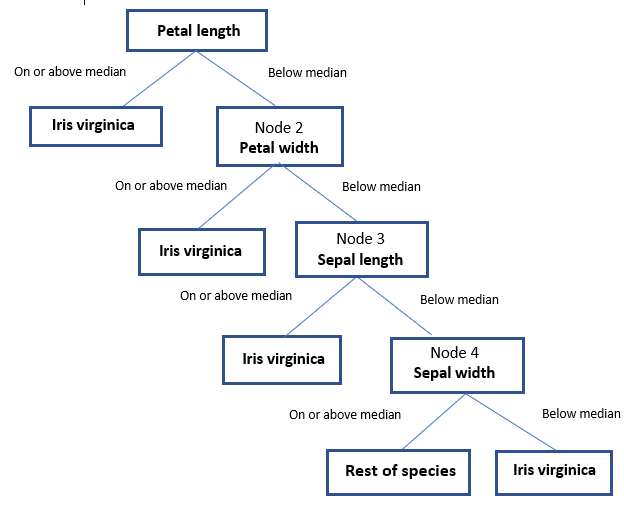

### 9.2 `Iris setosa`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Total Gini Index I.set.|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------------|------------|-----------|------------|-----------|
|------------------------|0.3079|0.3693|0.1055|0.1672|

The order of the nodes is:

1. Petal length
2. Petal width
3. Sepal length
4. Sepal width

The conditioned probabilities are:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris s.|0.1977|0.4125|0.0769|0.122|
|above not Iris s.|0.8023|0.5875|0.9231|0.878|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris s.|0.8421|0.0|1.0|1.0|
|below not Iris s.|0.1579|1.0|0.0|0.0|

First node: __petal length__ there is a 100% occurrence of _Iris setosa_ being __below__ the indicator.

Second node: __petal width__ there are 100% __below__.

Third node: __sepal length__ there are 84% occurrences of being __below__, while the other occurrences have a low probability.

Fourth node: __sepal width__ there are 0% probability of being below, so it must be __above__.

The decision tree is a little bit different regarding the order of the characteristics with using the median indicator:

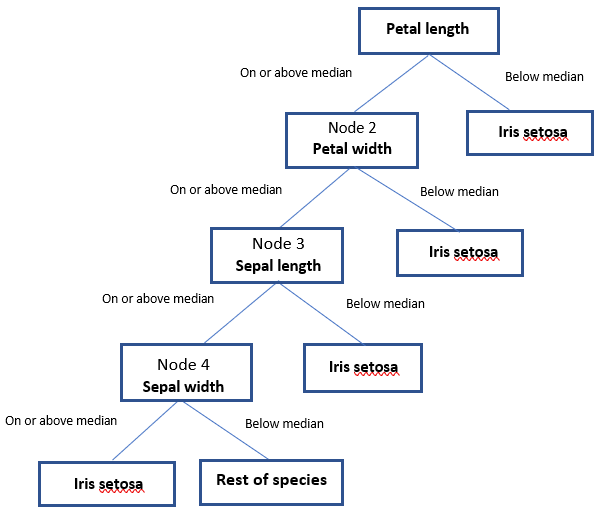

### 9.3 `Iris versicolor`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Total Gini Index I.vers.|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------------|------------|-----------|------------|-----------|
|------------------------|0.4215|0.3857|0.1055|0.38211|

The order of the nodes is:

1. Petal length
2. Petal width
3. Sepal width
4. Sepal length

The conditioned probabilities are:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris vers.|0.3837|0.2375|0.4487|04268|
|above not Iris vers.|0.6163|0.7625|0.5513|0.5732|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris s.|0.1053|0.64|0.0|0.0|
|below not Iris s.|0.8947|0.36|1.0|1.0|

First node: __petal length__ there is a 0% occurrence of _Iris versicolor_ being below the indicator, so they must be __above__.<br>

Second node: __petal width__ there are 0% below, which means that they are __above__ the indicator.<br>

Third node: __sepal width__ there are 64% occurrences of being __below__ the indicator, which relates to 76% probability of being above and not _Iris versicolor_.<br>

Fourth node: __sepal length__ there are 35% probability of being above and 36% of being below. We should not use this node, as we can not choose between the two, but in order to follow the nodes, I will choose __below__.

This decision tree follows the same splits as with the median indicator, however the species is located in different splits:

The decision tree for this species would be:

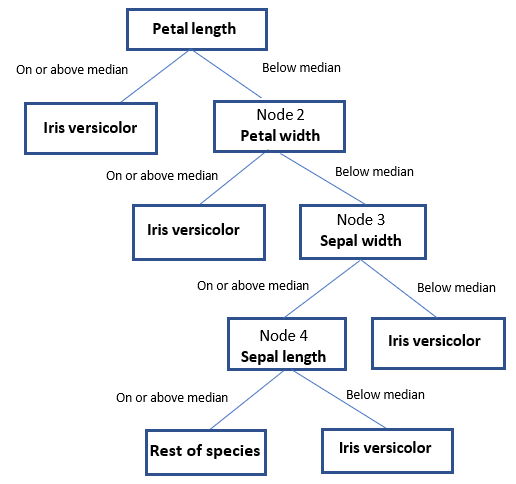

### 10 - EFFICIENCY OF THE DECISION TREES
***

#### 10.1 Test efficiency of the decision tree for `Iris virginica`.

In [40]:
def predict_species(df):
    if df['petal-width'] >= pw_indicator:
        if df['sepal-length'] >= sl_indicator:
            #if df['petal-length'] >= pl_indicator:
            #    if df['sepal-width'] <= sw_indicator:
            #        return "Iris-virginica"
            #    else:
            #        return None
                #return "Iris-virginica"
            #else:
            #    return None
            return "Iris-virginica"
        else:
            return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.28888888888888886


The efficiency of classification of _Iris virginica_ is 28.9% if we consider the first 3 nodes. Including the fourth node, the efficiency decreases to 11.1%.<br>

The last node should not be used for classification purposes.

#### 10.2 Test efficiency of the decision tree for `Iris setosa`.

In [45]:
def predict_species(df):
    if df['petal-length'] <= pl_indicator:
        if df['petal-width'] <= pw_indicator:
            #if df['sepal-length'] <= sl_indicator:
                #if df['sepal-width'] >= sw_indicator:
                #    return "Iris-setosa"
                #else:
                #    return None
            #    return "Iris-setosa"
            #else:
            #    return None
            return "Iris-setosa"
        else:
            return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size)

Proportion correctly identified 0.28888888888888886


The efficiency of classification of Iris setosa is 22.22% when all nodes are included. With the first 3 nodes, the efficiency increases to 24.44%, however the difference is not that significant.

#### 10.3 Test efficiency of the decision tree for `Iris versicolor`.

In [42]:
def predict_species(df):
    if df['petal-length'] >= pl_indicator:
        #if df['petal-width'] >= sw_indicator:
            #if df['sepal-width'] <= sl_indicator:
                #if df['sepal-length'] <= pw_indicator:
                #    return "Iris-versicolor"
                #else:
                #    return None
                #return "Iris-versicolor"
            #return None
         #   return "Iris-versicolor"
        #else:
         #   return None
        return "Iris-versicolor"
# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.3333333333333333


The efficiency of classification of Iris versicolor is 0% for all nodes, the same with 3 nodes and 2 nodes. Only with 1 node, it achieves an efficiency of 33.33%.

### 11 - PLOT GRAPH
***

For the petals we have:

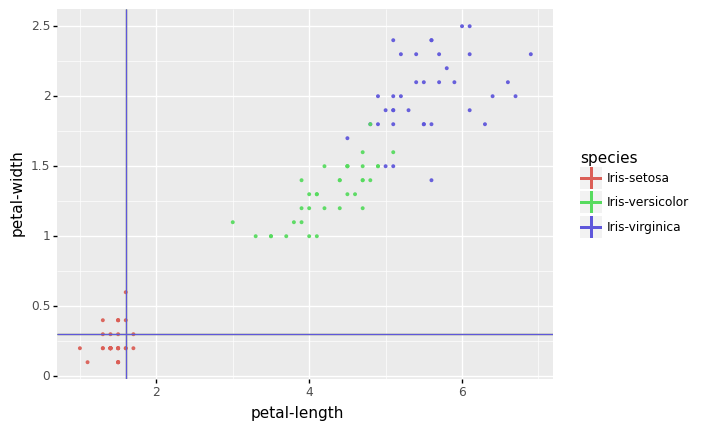

<ggplot: (155512239812)>

In [43]:
import plotly
import ggplot
from pandas import Timestamp
from plotnine import *
import warnings
warnings.filterwarnings('ignore', module='plotnine') 

(ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + 
        geom_point(alpha =0.9, size = 0.6) +
        geom_vline(train, aes(xintercept=pl_indicator, color='species')) +
        geom_hline(train, aes(yintercept=pw_indicator, color='species'))
)

For the sepals we have:

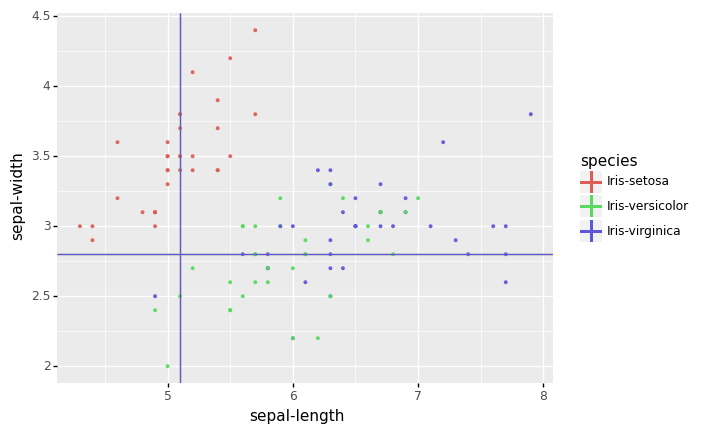

<ggplot: (155512605766)>

In [44]:
import plotly
import ggplot
from pandas import Timestamp
from plotnine import *
import warnings
warnings.filterwarnings('ignore', module='plotnine') 

(ggplot(train, aes(x='sepal-length', y='sepal-width', color='species')) + 
        geom_point(alpha =0.9, size = 0.6) +
        geom_vline(train, aes(xintercept=sl_indicator, color='species')) +
        geom_hline(train, aes(yintercept=sw_indicator, color='species'))
)

### CONCLUSION

The distribution of the nodes is the same as the mean in _Iris virginica_ and _Iris setosa_. The efficiency with _Iris virginica_ is better than with _Iris setosa_. The efficiency with _Iris versicolor_ is very low and the nodes cannot be used as a classification tool, but it can be used for the rest of the species.<br>
For a further analysis, it needs to be compared with the low quantile 80 - 20.